# Step #1. Background Detection

Try to extract background and cut it off

In [21]:
# Base import

import imutils
import cv2

import numpy as np
import PIL

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

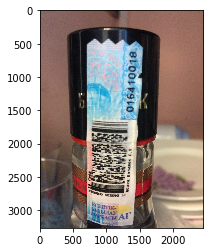

In [10]:
# Load image

excise_src = cv2.imread("data/Respect_wholesale/IMG_0307.JPG")

plt.imshow(cv2.cvtColor(excise_src, cv2.COLOR_BGR2RGB))

# Grayscale, Blur, Select edges

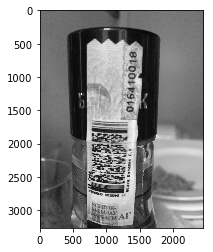

In [13]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

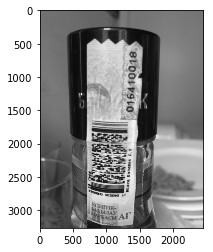

In [36]:
blurred = cv2.GaussianBlur(gray, (13, 13), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB))

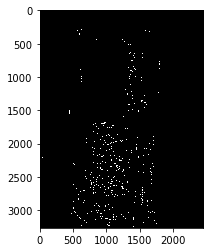

In [45]:
edged = cv2.Canny(blurred, 0, 55)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB))

# Manual Canny edge detector is horrible

Canny edge detector looks like this:

`cv2.canny(image, lower, upper)`

Where image  is the image that we want to detect edges in; and lower  and upper are our integer thresholds for lower and upper boundary on the gradient values, respectively.

The problem becomes determining these lower and upper thresholds.

What is the optimal value for the thresholds?

This question is especially important because we are processing multiple excise captured under varying lighting conditions.

This trick will save you time parameter tuning — and you’ll still get a nice Canny edge map after applying the function.

In [20]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

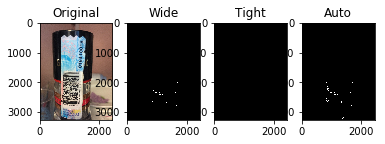

In [37]:
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

# show the images
fig = plt.figure()

a = fig.add_subplot(1,4,1)
imgplot = plt.imshow(cv2.cvtColor(excise_src, cv2.COLOR_BGR2RGB))
a.set_title('Original')

a = fig.add_subplot(1,4,2)
imgplot = plt.imshow(cv2.cvtColor(wide, cv2.COLOR_GRAY2RGB))
a.set_title('Wide')

a = fig.add_subplot(1,4,3)
imgplot = plt.imshow(cv2.cvtColor(tight, cv2.COLOR_GRAY2RGB))
a.set_title('Tight')

a = fig.add_subplot(1,4,4)
imgplot = plt.imshow(cv2.cvtColor(auto, cv2.COLOR_GRAY2RGB))
a.set_title('Auto')

plt.show()